In [278]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [279]:
class path:
    def __init__(self, x):
        self.path = x
        self.orientation = math.atan2(x[-1][1]-x[-2][1], x[-1][0]-x[-2][0])
        self.theta = math.atan2(x[-1][1]-x[0][1], x[-1][0]-x[0][0])
        self.last_point = x[-1]
        self.r=math.sqrt((x[-1][0])**2+(x[-1][1])**2)
class node:
    def __init__(self):
        self.path = None
        self.x = None
        self.y = None
        self.yaw = None
        self.parent = None
        self.children = []
        self.id=0
class loc:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.occupancy = 0

In [280]:
grid={}
for i in range(-100, 100):
    for j in range(-100, 100):
        grid[(i, j)]=loc(i, j)

In [187]:
all_paths=np.load('paths32.npy')
all_rel_paths= []
for i in range(all_paths.shape[0]):
    if (all_paths[i][-1] == 2): 
        all_rel_paths.append(all_paths[i])
path_ids=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] not in path_ids):
        path_ids.append(all_rel_paths[i][3])
print("number of relative paths: ", len(path_ids))
all_rel_paths_ids=[]
for i in range(len(path_ids)):
    all_rel_paths_ids.append(path_ids[i])
path_dict={}
for i in range(len(all_rel_paths_ids)):
    path_dict[all_rel_paths_ids[i]] = []
plx=[]
ply=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] in path_dict.keys()):
        path_dict[all_rel_paths[i][3]].append(all_rel_paths[i])
        plx.append(all_rel_paths[i][0])
        ply.append(all_rel_paths[i][1])
paths={}
for i in range(len(path_ids)):
    paths[i] = path(path_dict[path_ids[i]])

number of relative paths:  32


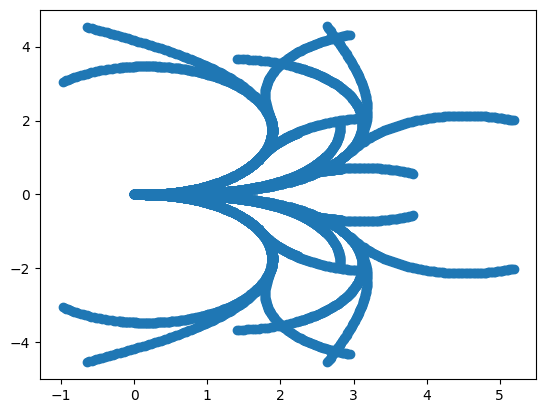

In [188]:
plt.scatter(plx,ply)

In [189]:
#this is when odom goes in
odom = [0,0,0]

In [146]:
def valid_path(path_id,node_id):
    for i in range(len(paths[path_id].path)):
        rad=math.sqrt((paths[path_id].path[i][0])**2+(paths[path_id].path[i][1])**2)
        theta=math.atan2(paths[path_id].path[i][1],paths[path_id].path[i][0])
        xnew=nodes[node_id].x+rad*math.cos(theta+nodes[node_id].yaw)
        ynew=nodes[node_id].y+rad*math.sin(theta+nodes[node_id].yaw)
        if (grid[(int(xnew),int(ynew))].occupancy==1):
            return False
    return True
    
def draw_children(node_id,node_ids):
    node_counter = node_ids[-1]
    for i in range(len(path_ids)):
        node_counter+=1
        if (not valid_path(i,node_id)):
            continue
        rad=paths[i].r
        theta=paths[i].theta
        # print("theta: ", theta)
        xnew=nodes[node_id].x+rad*math.cos(theta+nodes[node_id].yaw)
        ynew=nodes[node_id].y+rad*math.sin(theta+nodes[node_id].yaw)
        theta_new=paths[i].orientation+nodes[node_id].yaw
        nodes[node_counter]=node()
        nodes[node_counter].x=xnew
        nodes[node_counter].y=ynew
        nodes[node_counter].yaw=theta_new
        nodes[node_counter].id=node_counter
        nodes[node_counter].parent=node_id
        nodes[node_id].children.append(node_counter)
        next_ids.append(node_counter)
    return node_counter


In [147]:
nodes={}
global node_counter
node_counter=0
node_ids=[]
current_ids=[]
next_ids=[]
node_ids=[]
node_ids.append(0)
nodes[0]=node()
nodes[0].x=odom[0]
nodes[0].y=odom[1]
nodes[0].yaw=odom[2]
nodes[0].id=0
current_ids=[]
next_ids=[0]
for i in tqdm(range(3)):
    current_ids=next_ids
    next_ids=[]
    for j in range(len(current_ids)):
        node_ids.append(draw_children(current_ids[j],node_ids))
print("number of paths: ", len(paths))
print("number of nodes: ", len(nodes))
print("number of current nodes: ", len(current_ids))
print("number of next nodes: ", len(next_ids))

100%|██████████| 3/3 [00:00<00:00, 22.76it/s]

number of paths:  32
number of nodes:  33825
number of current nodes:  1024
number of next nodes:  32768


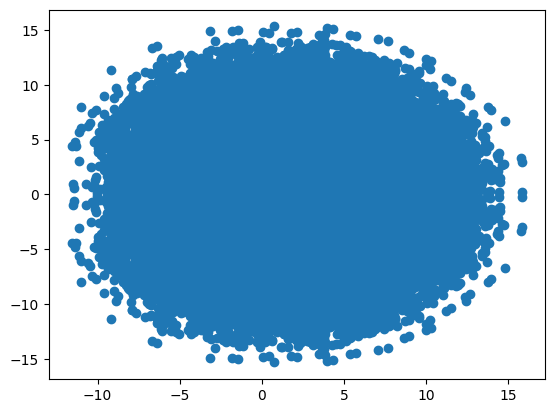

In [148]:
plnx=[]
plny=[]
for i in nodes.keys():
    plnx.append(nodes[i].x)
    plny.append(nodes[i].y)
plt.scatter(plnx,plny)
# plt.scatter(plx,ply)

In [ ]:
useless=[96, 97, 98, 100, 101,   108,109,110,111,112,114,115,116,117,118,119,120,121,122,123]

In [149]:
path_ids

[96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0]

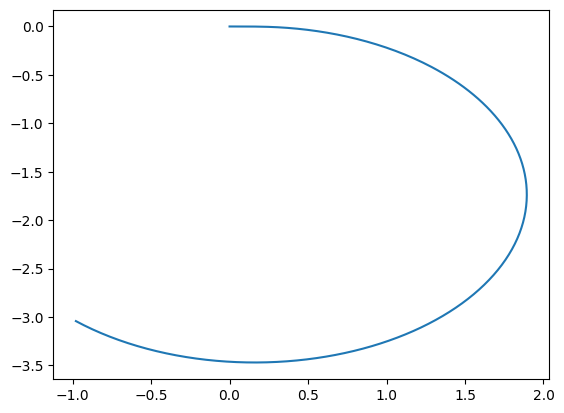

In [181]:
pathx=[]
pathy=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] == 114.0):
        pathx.append(all_rel_paths[i][0])
        pathy.append(all_rel_paths[i][1])
plt.plot(pathx,pathy)

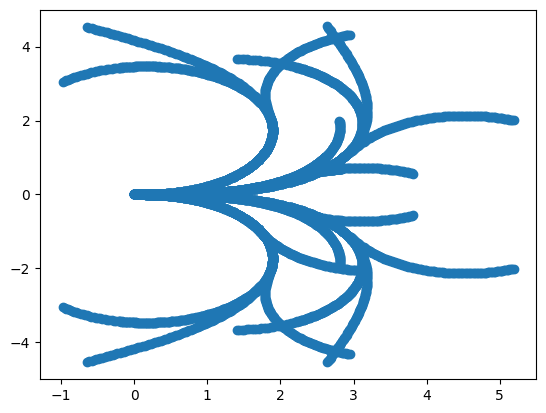

In [178]:
plt.scatter(plx,ply)

In [275]:
# useless = [96, 97, 98, 99, 100, 101, 108, 109, 110, 111, 112, 113]
useless = [96, 97, 98, 99, 100, 101, 108, 109, 110, 111, 112, 113,114,116,122,123,124]

In [276]:
plnewx=[]
plnewy=[]
for i in range(len(all_rel_paths)):
    if (all_rel_paths[i][3] in path_dict.keys()):
        if (all_rel_paths[i][3] in useless):
            continue
        path_dict[all_rel_paths[i][3]].append(all_rel_paths[i])
        plnewx.append(all_rel_paths[i][0])
        plnewy.append(all_rel_paths[i][1])

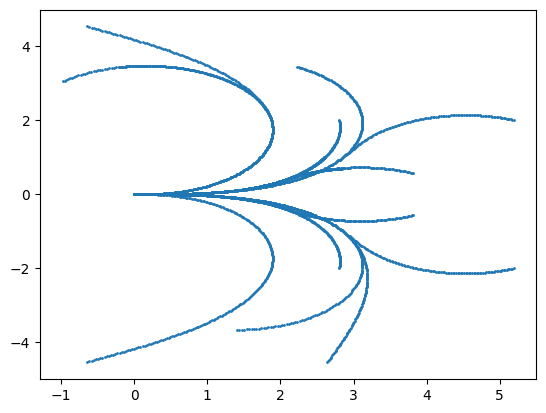

In [277]:
plt.scatter(plnewx,plnewy,s=1)

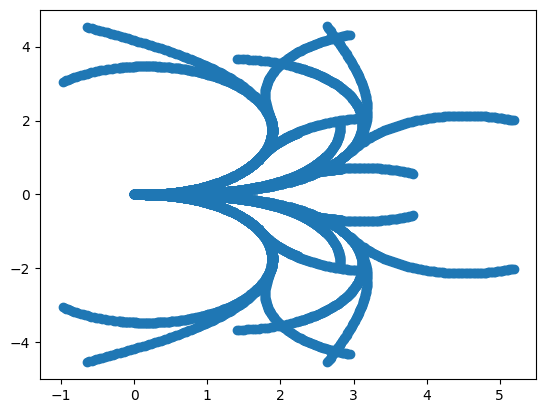

In [217]:
plt.scatter(plx,ply)
    